In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns


In [3]:
df=pd.read_csv(r'C:\Users\aksha\Downloads\bank-full.csv')

In [4]:
df

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
0        unknown    5   may       261         1     -1         0  unknown   
1        unknown    5   may       151         1     -1         0  unknown   
2        unknown    5   may        76         1     -1         0  unknown   
3        unknown    5   may        92         1     -1         0  unknown   
4        unknown    5   may       198         1     -1         0  unknown   
...          ...  ...   ...       ...       ...    ...       ...      ...   
45206   cellular   17   nov       977         3     -1         0  unknown   
45207   cellular   17   nov       456         2     -1         0  unknown   
45208   cellular   17   nov      1127         5    184         3  success   
45209  telephone   17   nov       508         4     -1         0  unknown   
45210   cellular   17   nov       361         2    188        11    other   

      Target  
0         no  
1         no  
2         no  
3         no  
4         no  
...      ...  
45206    yes  
45207    yes  
45208    yes  
45209     no  
45210     no  

[45211 rows x 17 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
print(df.job.unique())
print(df.marital.unique())
print(df.default.unique())
print(df.housing.unique())
print(df.loan.unique())
print(df.poutcome.unique())
print(df.Target.unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
['married' 'single' 'divorced']
['no' 'yes']
['yes' 'no']
['no' 'yes']
['unknown' 'failure' 'other' 'success']
['no' 'yes']


In [7]:
for i in df:
    df[i]=df[i].astype('category')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  category
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  category
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  category
 10  month      45211 non-null  category
 11  duration   45211 non-null  category
 12  campaign   45211 non-null  category
 13  pdays      45211 non-null  category
 14  previous   45211 non-null  category
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  category
dtypes: category(17)
memory usage: 1.2 MB


In [9]:
for i in df:
    df[i]=df[i].cat.codes

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int8 
 1   job        45211 non-null  int8 
 2   marital    45211 non-null  int8 
 3   education  45211 non-null  int8 
 4   default    45211 non-null  int8 
 5   balance    45211 non-null  int16
 6   housing    45211 non-null  int8 
 7   loan       45211 non-null  int8 
 8   contact    45211 non-null  int8 
 9   day        45211 non-null  int8 
 10  month      45211 non-null  int8 
 11  duration   45211 non-null  int16
 12  campaign   45211 non-null  int8 
 13  pdays      45211 non-null  int16
 14  previous   45211 non-null  int8 
 15  poutcome   45211 non-null  int8 
 16  Target     45211 non-null  int8 
dtypes: int16(3), int8(14)
memory usage: 883.2 KB


In [11]:
df

age  job  marital  education  default  balance  housing  loan  contact  \
0       40    4        1          2        0     3036        1     0        2   
1       26    9        2          1        0      945        1     0        2   
2       15    2        1          1        0      918        1     1        2   
3       29    1        1          3        0     2420        1     0        2   
4       15   11        2          3        0      917        0     0        2   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
45206   33    9        1          2        0     1741        0     0        0   
45207   53    5        0          0        0     2639        0     0        0   
45208   54    5        1          1        0     5455        0     0        0   
45209   39    1        1          1        0     1584        0     0        1   
45210   19    2        1          1        0     3779        0     0        0   

       day  month  duration  campaign  pdays  previous  poutcome  Target  
0        4      8       261         0      0         0         3       0  
1        4      8       151         0      0         0         3       0  
2        4      8        76         0      0         0         3       0  
3        4      8        92         0      0         0         3       0  
4        4      8       198         0      0         0         3       0  
...    ...    ...       ...       ...    ...       ...       ...     ...  
45206   16      9       975         2      0         0         3       1  
45207   16      9       456         1      0         0         3       1  
45208   16      9      1116         4    181         3         2       1  
45209   16      9       508         3      0         0         3       0  
45210   16      9       361         1    185        11         1       0  

[45211 rows x 17 columns]

<Axes: xlabel='Target', ylabel='count'>

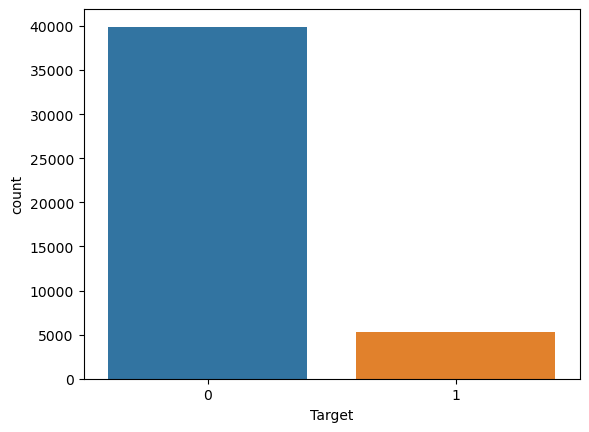

In [12]:
sns.countplot(x='Target',data=df)

In [13]:
from sklearn.preprocessing import Normalizer

In [14]:
norm=Normalizer()

In [15]:
df_new=pd.DataFrame(norm.fit_transform(df),columns=df.columns)
df_new

age       job   marital  education  default   balance   housing  \
0      0.013126  0.001313  0.000328   0.000656      0.0  0.996233  0.000328   
1      0.027156  0.009400  0.002089   0.001044      0.0  0.987012  0.001044   
2      0.016281  0.002171  0.001085   0.001085      0.0  0.996399  0.001085   
3      0.011974  0.000413  0.000413   0.001239      0.0  0.999198  0.000413   
4      0.015985  0.011722  0.002131   0.003197      0.0  0.977223  0.000000   
...         ...       ...       ...        ...      ...       ...       ...   
45206  0.016535  0.004509  0.000501   0.001002      0.0  0.872330  0.000000   
45207  0.019786  0.001867  0.000000   0.000000      0.0  0.985179  0.000000   
45208  0.009693  0.000897  0.000179   0.000179      0.0  0.979138  0.000000   
45209  0.023437  0.000601  0.000601   0.000601      0.0  0.951905  0.000000   
45210  0.004999  0.000526  0.000263   0.000263      0.0  0.994260  0.000000   

           loan   contact       day     month  duration  campaign     pdays  \
0      0.000000  0.000656  0.001313  0.002625  0.085645  0.000000  0.000000   
1      0.000000  0.002089  0.004178  0.008356  0.157713  0.000000  0.000000   
2      0.001085  0.002171  0.004342  0.008683  0.082491  0.000000  0.000000   
3      0.000000  0.000826  0.001652  0.003303  0.037986  0.000000  0.000000   
4      0.000000  0.002131  0.004263  0.008525  0.211003  0.000000  0.000000   
...         ...       ...       ...       ...       ...       ...       ...   
45206  0.000000  0.000000  0.008017  0.004509  0.488525  0.001002  0.000000   
45207  0.000000  0.000000  0.005973  0.003360  0.170232  0.000373  0.000000   
45208  0.000000  0.000000  0.002872  0.001615  0.200315  0.000718  0.032488   
45209  0.000000  0.000601  0.009615  0.005409  0.305283  0.001803  0.000000   
45210  0.000000  0.000000  0.004210  0.002368  0.094980  0.000263  0.048674   

       previous  poutcome    Target  
0      0.000000  0.000984  0.000000  
1      0.000000  0.003133  0.000000  
2      0.000000  0.003256  0.000000  
3      0.000000  0.001239  0.000000  
4      0.000000  0.003197  0.000000  
...         ...       ...       ...  
45206  0.000000  0.001503  0.000501  
45207  0.000000  0.001120  0.000373  
45208  0.000538  0.000359  0.000179  
45209  0.000000  0.001803  0.000000  
45210  0.002894  0.000263  0.000000  

[45211 rows x 17 columns]

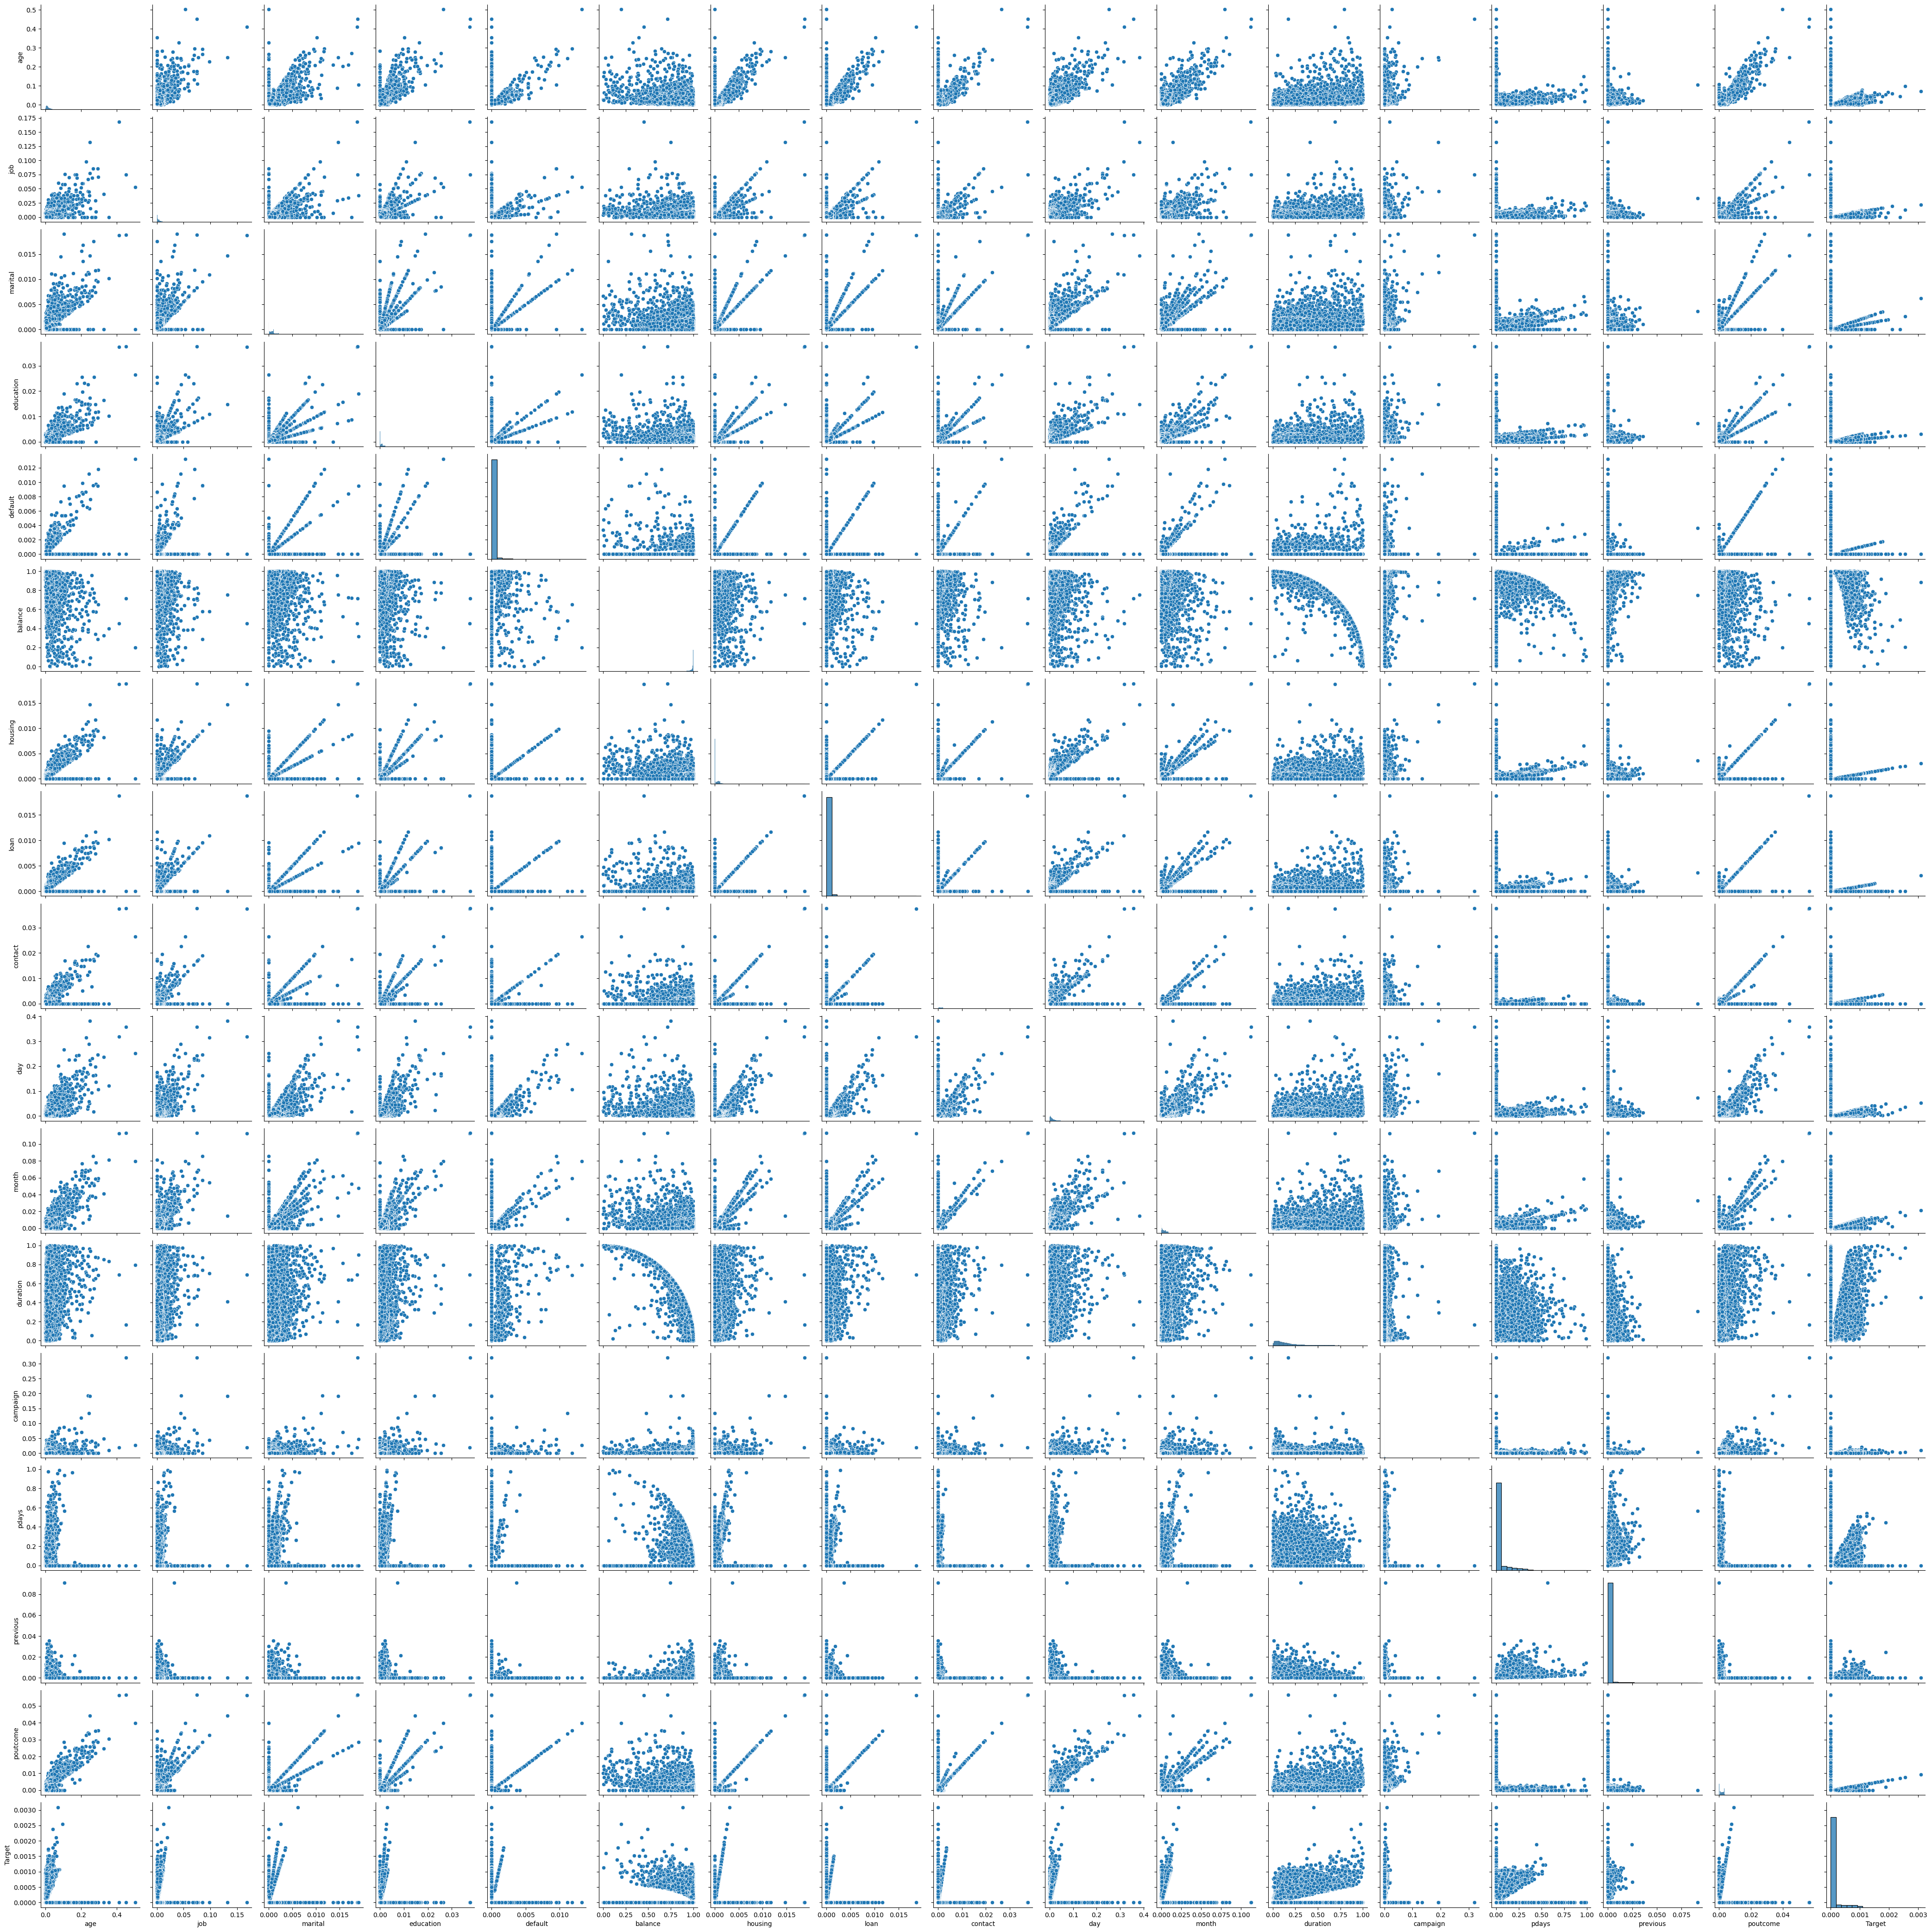

In [21]:
sns.pairplot(df_new)

In [16]:
outlier=df_new.copy()
outlier

age       job   marital  education  default   balance   housing  \
0      0.013126  0.001313  0.000328   0.000656      0.0  0.996233  0.000328   
1      0.027156  0.009400  0.002089   0.001044      0.0  0.987012  0.001044   
2      0.016281  0.002171  0.001085   0.001085      0.0  0.996399  0.001085   
3      0.011974  0.000413  0.000413   0.001239      0.0  0.999198  0.000413   
4      0.015985  0.011722  0.002131   0.003197      0.0  0.977223  0.000000   
...         ...       ...       ...        ...      ...       ...       ...   
45206  0.016535  0.004509  0.000501   0.001002      0.0  0.872330  0.000000   
45207  0.019786  0.001867  0.000000   0.000000      0.0  0.985179  0.000000   
45208  0.009693  0.000897  0.000179   0.000179      0.0  0.979138  0.000000   
45209  0.023437  0.000601  0.000601   0.000601      0.0  0.951905  0.000000   
45210  0.004999  0.000526  0.000263   0.000263      0.0  0.994260  0.000000   

           loan   contact       day     month  duration  campaign     pdays  \
0      0.000000  0.000656  0.001313  0.002625  0.085645  0.000000  0.000000   
1      0.000000  0.002089  0.004178  0.008356  0.157713  0.000000  0.000000   
2      0.001085  0.002171  0.004342  0.008683  0.082491  0.000000  0.000000   
3      0.000000  0.000826  0.001652  0.003303  0.037986  0.000000  0.000000   
4      0.000000  0.002131  0.004263  0.008525  0.211003  0.000000  0.000000   
...         ...       ...       ...       ...       ...       ...       ...   
45206  0.000000  0.000000  0.008017  0.004509  0.488525  0.001002  0.000000   
45207  0.000000  0.000000  0.005973  0.003360  0.170232  0.000373  0.000000   
45208  0.000000  0.000000  0.002872  0.001615  0.200315  0.000718  0.032488   
45209  0.000000  0.000601  0.009615  0.005409  0.305283  0.001803  0.000000   
45210  0.000000  0.000000  0.004210  0.002368  0.094980  0.000263  0.048674   

       previous  poutcome    Target  
0      0.000000  0.000984  0.000000  
1      0.000000  0.003133  0.000000  
2      0.000000  0.003256  0.000000  
3      0.000000  0.001239  0.000000  
4      0.000000  0.003197  0.000000  
...         ...       ...       ...  
45206  0.000000  0.001503  0.000501  
45207  0.000000  0.001120  0.000373  
45208  0.000538  0.000359  0.000179  
45209  0.000000  0.001803  0.000000  
45210  0.002894  0.000263  0.000000  

[45211 rows x 17 columns]

In [17]:
fig, axis=plt.subplots(15,1,figsize=(12,16),sharex=False,sharey=False)
sns.boxplot(x='job',data=outlier,ax=axis[0])
sns.boxplot(x='marital',data=outlier,ax=axis[1])
sns.boxplot(x='education',data=outlier,ax=axis[2])
sns.boxplot(x='default',data=outlier,ax=axis[3])
sns.boxplot(x='balance',data=outlier,ax=axis[4])
sns.boxplot(x='housing',data=outlier,ax=axis[5])
sns.boxplot(x='loan',data=outlier,ax=axis[6])
sns.boxplot(x='contact',data=outlier,ax=axis[7])
sns.boxplot(x='day',data=outlier,ax=axis[8])
sns.boxplot(x='month',data=outlier,ax=axis[9])
sns.boxplot(x='duration',data=outlier,ax=axis[10])
sns.boxplot(x='campaign',data=outlier,ax=axis[11])
sns.boxplot(x='pdays',data=outlier,ax=axis[12])
sns.boxplot(x='previous',data=outlier,ax=axis[13])
sns.boxplot(x='poutcome',data=outlier,ax=axis[14])
plt.tight_layout(pad=2.0)

In [17]:
log_r=LogisticRegression()

In [18]:
target=df[['Target']]

In [19]:
features=df_new.drop('Target',axis=1)

In [20]:
target

Target
0           0
1           0
2           0
3           0
4           0
...       ...
45206       1
45207       1
45208       1
45209       0
45210       0

[45211 rows x 1 columns]

In [21]:
features

age       job   marital  education  default   balance   housing  \
0      0.013126  0.001313  0.000328   0.000656      0.0  0.996233  0.000328   
1      0.027156  0.009400  0.002089   0.001044      0.0  0.987012  0.001044   
2      0.016281  0.002171  0.001085   0.001085      0.0  0.996399  0.001085   
3      0.011974  0.000413  0.000413   0.001239      0.0  0.999198  0.000413   
4      0.015985  0.011722  0.002131   0.003197      0.0  0.977223  0.000000   
...         ...       ...       ...        ...      ...       ...       ...   
45206  0.016535  0.004509  0.000501   0.001002      0.0  0.872330  0.000000   
45207  0.019786  0.001867  0.000000   0.000000      0.0  0.985179  0.000000   
45208  0.009693  0.000897  0.000179   0.000179      0.0  0.979138  0.000000   
45209  0.023437  0.000601  0.000601   0.000601      0.0  0.951905  0.000000   
45210  0.004999  0.000526  0.000263   0.000263      0.0  0.994260  0.000000   

           loan   contact       day     month  duration  campaign     pdays  \
0      0.000000  0.000656  0.001313  0.002625  0.085645  0.000000  0.000000   
1      0.000000  0.002089  0.004178  0.008356  0.157713  0.000000  0.000000   
2      0.001085  0.002171  0.004342  0.008683  0.082491  0.000000  0.000000   
3      0.000000  0.000826  0.001652  0.003303  0.037986  0.000000  0.000000   
4      0.000000  0.002131  0.004263  0.008525  0.211003  0.000000  0.000000   
...         ...       ...       ...       ...       ...       ...       ...   
45206  0.000000  0.000000  0.008017  0.004509  0.488525  0.001002  0.000000   
45207  0.000000  0.000000  0.005973  0.003360  0.170232  0.000373  0.000000   
45208  0.000000  0.000000  0.002872  0.001615  0.200315  0.000718  0.032488   
45209  0.000000  0.000601  0.009615  0.005409  0.305283  0.001803  0.000000   
45210  0.000000  0.000000  0.004210  0.002368  0.094980  0.000263  0.048674   

       previous  poutcome  
0      0.000000  0.000984  
1      0.000000  0.003133  
2      0.000000  0.003256  
3      0.000000  0.001239  
4      0.000000  0.003197  
...         ...       ...  
45206  0.000000  0.001503  
45207  0.000000  0.001120  
45208  0.000538  0.000359  
45209  0.000000  0.001803  
45210  0.002894  0.000263  

[45211 rows x 16 columns]

In [22]:
corr=features.corr()
corr

age       job   marital  education   default   balance  \
age        1.000000  0.501310  0.426399   0.571575  0.336058 -0.329213   
job        0.501310  1.000000  0.456784   0.539079  0.230513 -0.235604   
marital    0.426399  0.456784  1.000000   0.540304  0.296565 -0.274116   
education  0.571575  0.539079  0.540304   1.000000  0.271146 -0.270138   
default    0.336058  0.230513  0.296565   0.271146  1.000000 -0.214926   
balance   -0.329213 -0.235604 -0.274116  -0.270138 -0.214926  1.000000   
housing    0.489630  0.389055  0.476666   0.464037  0.236287 -0.319881   
loan       0.427348  0.333256  0.352551   0.362841  0.262605 -0.233161   
contact    0.406169  0.259265  0.322069   0.321950  0.215584 -0.162688   
day        0.628350  0.515497  0.544580   0.579355  0.330612 -0.284605   
month      0.636069  0.440679  0.557517   0.546771  0.335708 -0.336966   
duration   0.292028  0.220938  0.275865   0.246767  0.147940 -0.856595   
campaign   0.334818  0.288470  0.302966   0.338999  0.138764 -0.083435   
pdays      0.042663  0.023620  0.069416   0.043855 -0.003098 -0.187622   
previous   0.038199  0.028715  0.054382   0.043905  0.012361 -0.093070   
poutcome   0.736452  0.572840  0.634839   0.649151  0.378045 -0.300883   

            housing      loan   contact       day     month  duration  \
age        0.489630  0.427348  0.406169  0.628350  0.636069  0.292028   
job        0.389055  0.333256  0.259265  0.515497  0.440679  0.220938   
marital    0.476666  0.352551  0.322069  0.544580  0.557517  0.275865   
education  0.464037  0.362841  0.321950  0.579355  0.546771  0.246767   
default    0.236287  0.262605  0.215584  0.330612  0.335708  0.147940   
balance   -0.319881 -0.233161 -0.162688 -0.284605 -0.336966 -0.856595   
housing    1.000000  0.355983  0.469304  0.509533  0.678700  0.268468   
loan       0.355983  1.000000  0.208854  0.390836  0.409900  0.189974   
contact    0.469304  0.208854  1.000000  0.363930  0.601178  0.171741   
day        0.509533  0.390836  0.363930  1.000000  0.595504  0.260703   
month      0.678700  0.409900  0.601178  0.595504  1.000000  0.307397   
duration   0.268468  0.189974  0.171741  0.260703  0.307397  1.000000   
campaign   0.287133  0.138173  0.216573  0.429667  0.245042  0.037358   
pdays      0.143328  0.011916 -0.151566 -0.011722  0.091989  0.027745   
previous   0.076116  0.021002 -0.109603 -0.001443  0.062929  0.014107   
poutcome   0.580753  0.460171  0.533138  0.720351  0.697314  0.341164   

           campaign     pdays  previous  poutcome  
age        0.334818  0.042663  0.038199  0.736452  
job        0.288470  0.023620  0.028715  0.572840  
marital    0.302966  0.069416  0.054382  0.634839  
education  0.338999  0.043855  0.043905  0.649151  
default    0.138764 -0.003098  0.012361  0.378045  
balance   -0.083435 -0.187622 -0.093070 -0.300883  
housing    0.287133  0.143328  0.076116  0.580753  
loan       0.138173  0.011916  0.021002  0.460171  
contact    0.216573 -0.151566 -0.109603  0.533138  
day        0.429667 -0.011722 -0.001443  0.720351  
month      0.245042  0.091989  0.062929  0.697314  
duration   0.037358  0.027745  0.014107  0.341164  
campaign   1.000000 -0.032132 -0.006201  0.407137  
pdays     -0.032132  1.000000  0.562627 -0.322512  
previous  -0.006201  0.562627  1.000000 -0.218684  
poutcome   0.407137 -0.322512 -0.218684  1.000000

<Axes: >

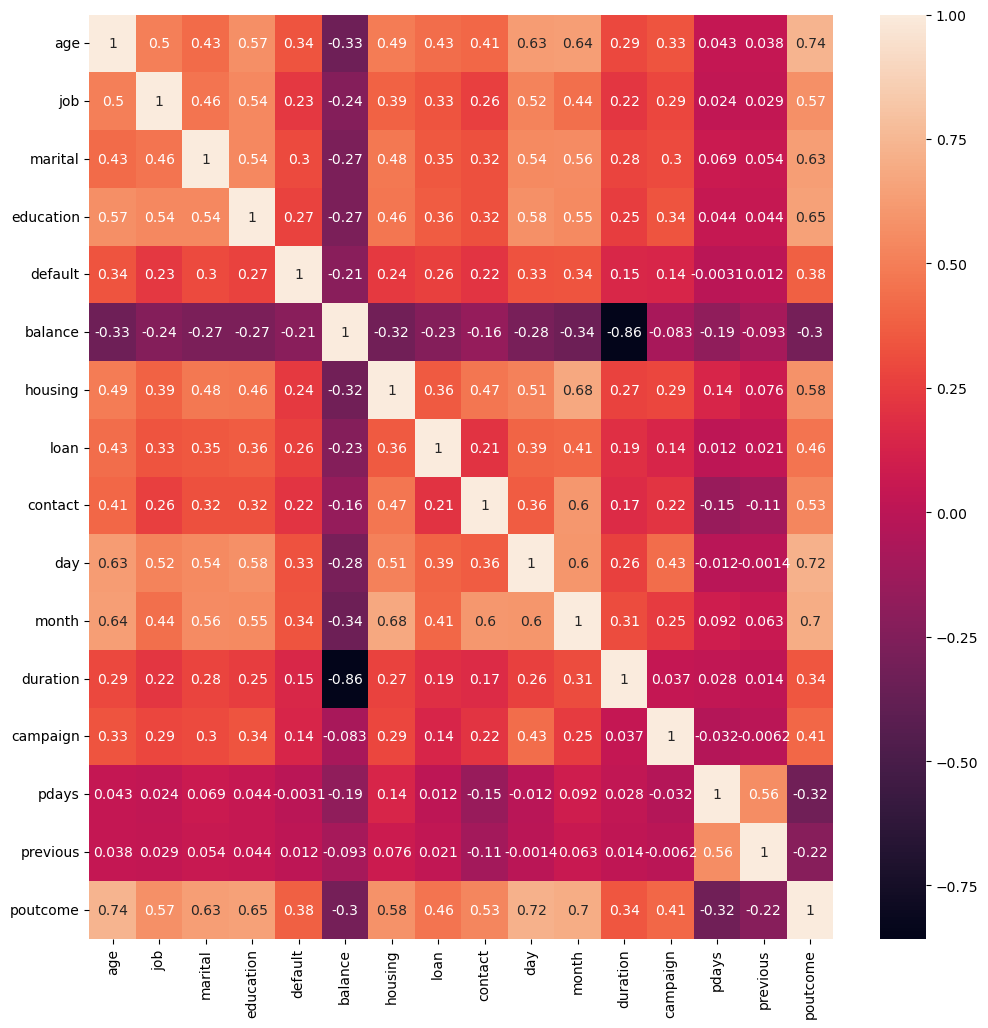

In [23]:
plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=True)

In [24]:
target.Target.value_counts()

0    39922
1     5289
Name: Target, dtype: int64

In [25]:
xtrain,xtest,ytrain,ytest=train_test_split(features,target,random_state=100,train_size=0.75)

In [26]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)



(33908, 16)
(11303, 16)
(33908, 1)
(11303, 1)


In [27]:
log_r.fit(xtrain,ytrain)

C:\Users\aksha\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

### predicting using the training set

In [28]:
ypredt_train=log_r.predict(xtrain)

In [29]:
ypredt_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [46]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,auc,precision_score,recall_score,roc_auc_score,roc_curve

In [33]:
conf=confusion_matrix(ytrain,ypredt_train)
conf

array([[29881,    47],
       [ 3900,    80]], dtype=int64)

In [34]:
import seaborn as sns

In [37]:
sns.heatmap(conf,annot=True,fmt="d")

<Axes: >

In [38]:
acc_train=accuracy_score(ytrain,ypredt_train)
acc_train

0.8835967913176831

In [40]:
rec_train=recall_score(ytrain,ypredt_train)
rec_train

0.020100502512562814

In [42]:
pre_train=precision_score(ytrain,ypredt_train)
pre_train

0.6299212598425197

In [43]:
class_train=classification_report(ytrain,ypredt_train)

In [44]:
print(class_train)

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     29928
           1       0.63      0.02      0.04      3980

    accuracy                           0.88     33908
   macro avg       0.76      0.51      0.49     33908
weighted avg       0.85      0.88      0.83     33908



In [86]:
ytrainpredt_proba=log_r.predict_proba(xtrain)[:,1:]

In [87]:
ytrainpredt_proba

array([[0.12226654],
       [0.08014402],
       [0.08023001],
       ...,
       [0.06356684],
       [0.12927496],
       [0.1444051 ]])

In [89]:
fpr,tpr,threshold=roc_curve(ytrain,ytrainpredt_proba)

In [91]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### using test values

In [54]:
ypredt=log_r.predict(xtest)

In [55]:
ypredt

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [56]:
accuracy_score(ytest,ypredt)

0.884455454304167

In [57]:
precision_score(ytest,ypredt)

0.5348837209302325

In [58]:
recall_score(ytest,ypredt)

0.01757066462948816

In [60]:
class_predt=classification_report(ytest,ypredt)
print(class_predt)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      9994
           1       0.53      0.02      0.03      1309

    accuracy                           0.88     11303
   macro avg       0.71      0.51      0.49     11303
weighted avg       0.85      0.88      0.83     11303



In [99]:
auc1=roc_auc_score(ytest,ypredt)
auc1

0.5077847319545279

In [79]:
ypreddt_proba=log_r.predict_proba(xtest)[:,1:]

In [80]:
ypreddt_proba

array([[0.08088129],
       [0.10602569],
       [0.05855636],
       ...,
       [0.05886851],
       [0.07356921],
       [0.01403997]])

### ROC CURVE For True(1)

In [81]:
fp,tp,thres=roc_curve(ytest,ypreddt_proba)

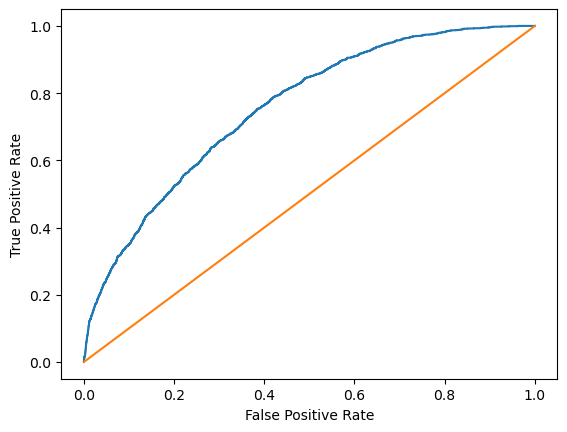

In [83]:
plt.plot(fp,tp)
plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel("True Positive Rate")
plt.show()

### ROC For False(0)

In [92]:
ypreddt_proba2=log_r.predict_proba(xtest)[:,0:1]

In [93]:
ypreddt_proba2

array([[0.91911871],
       [0.89397431],
       [0.94144364],
       ...,
       [0.94113149],
       [0.92643079],
       [0.98596003]])

In [96]:
fp1,tp1,thres1=roc_curve(ytest,ypreddt_proba2)

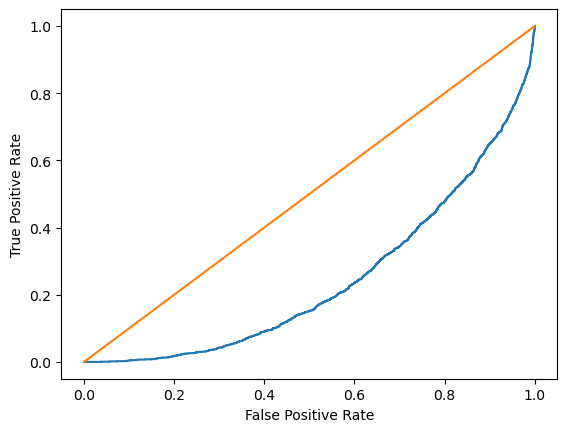

In [97]:
plt.plot(fp1,tp1)
plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel("True Positive Rate")
plt.show()